Este documento exemplifica diversas técnicas de Análise Exploratória de Dados (*Exploratory Data Analysis*, EDA) utilizando o conjunto de dados Adult Income do repositório UCI.

Em geral, técnicas de EDA ajudam a entender melhor o conjunto de dados Adult Income, permitindo visualizar a distribuição de dados, identificar outliers e entender as relações entre diferentes atributos. Esses insights são essenciais para preparar o conjunto de dados para modelagem e tomada de decisões baseada em dados.

O conjunto de dados Adult Income, do repositório UCI, contém informações demográficas de indivíduos, como idade, educação, ocupação e renda, e é frequentemente usado para prever se uma pessoa ganha mais de $50.000 por ano.

## Carregando o Conjunto de Dados

Primeiro, carregamos o conjunto de dados e visualizamos suas primeiras linhas para entender sua estrutura.


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Carregar o conjunto de dados
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
           "hours-per-week", "native-country", "income"]

data = pd.read_csv(url, names=columns, sep=',\s', na_values=["?"], engine='python')

# Visualizar as primeiras linhas do conjunto de dados
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Análise Exploratória dos Dados

## Estatísticas Resumidas

Para começar, vamos visualizar estatísticas descritivas para entender a distribuição e o intervalo dos recursos numéricos.

In [23]:
# Estatísticas descritivas
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Verificando Valores Ausentes

É importante verificar se há valores ausentes no conjunto de dados, pois isso pode afetar as análises e modelos subsequentes.

In [24]:
# Verificar valores ausentes
print(data.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


## Dividindo um atributo numérico em categorias

O exemplo a seguir ilustra como um atributo numérico pode ser analisado por faixas de valores. Nesse exemplo, usamos o método [`pd.cut`](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) para criar variável `age_group` que categoriza a idade em quatro faixas: '<35', '35-49', '50-65', e '>65'.

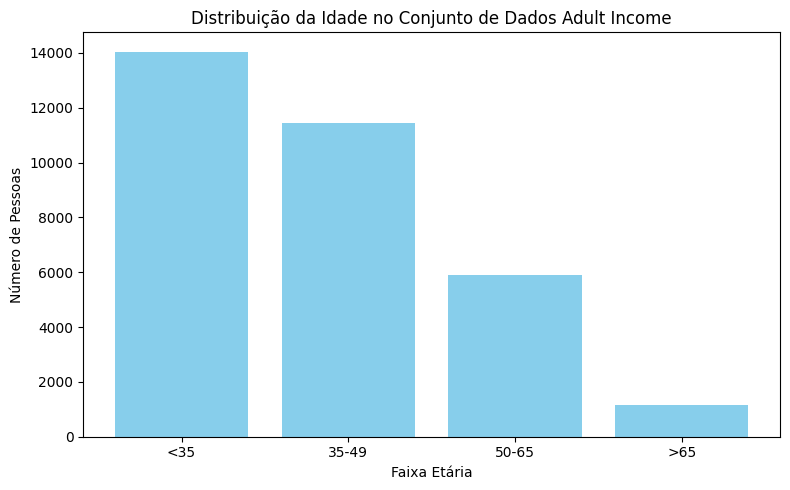

In [25]:
# Definindo as faixas etárias
bins = [0, 34, 49, 65, 100]
labels = ['<35', '35-49', '50-65', '>65']
categorias_idade = pd.cut(data['age'], bins=bins, labels=labels)

# Contando a quantidade de pessoas em cada faixa etária
age_counts = categorias_idade.value_counts().reindex(labels)

# Plotando o bar chart
plt.figure(figsize=(8, 5))
plt.bar(age_counts.index, age_counts.values, color='skyblue')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição da Idade no Conjunto de Dados Adult Income')
plt.show()

## Visualizando Distribuições

### a. Histograma para Atributos Numéricos

Histogramas são úteis para visualizar a distribuição de atributos numéricos, como `age` (idade), `hours-per-week` (horas por semana), `capital-gain` (ganho de capital) e `capital-loss` (perda de capital).

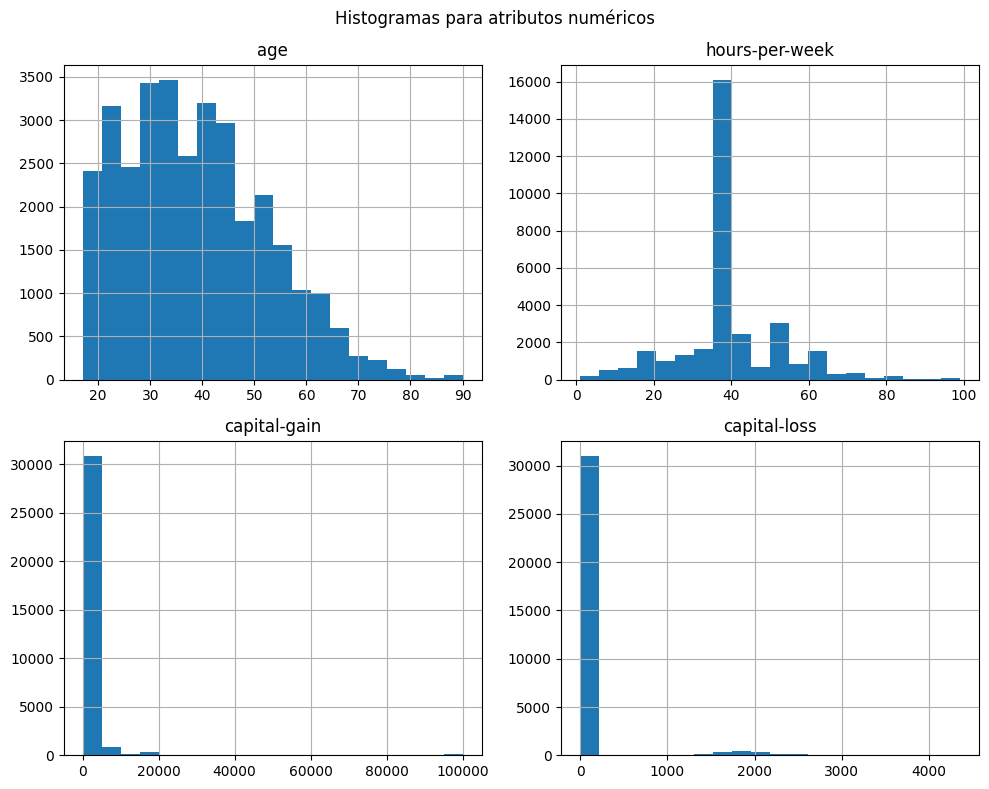

In [33]:
import matplotlib.pyplot as plt

data.hist(column=['age', 'hours-per-week', 'capital-gain', 'capital-loss'], bins=20, figsize=(10, 8))
plt.suptitle('Histogramas para atributos numéricos')
plt.show()

### b. Box Plot para Atributos Numéricos

Box plots mostram a distribuição de atributos numéricos e destacam *outliers*.

> Um outlier (ou "valor atípico") é um ponto de dado que se distancia significativamente dos outros pontos do conjunto de dados. Outliers são valores que são extremamente diferentes do restante dos dados e podem aparecer em qualquer direção, tanto para cima quanto para baixo, em relação à média ou mediana dos dados.

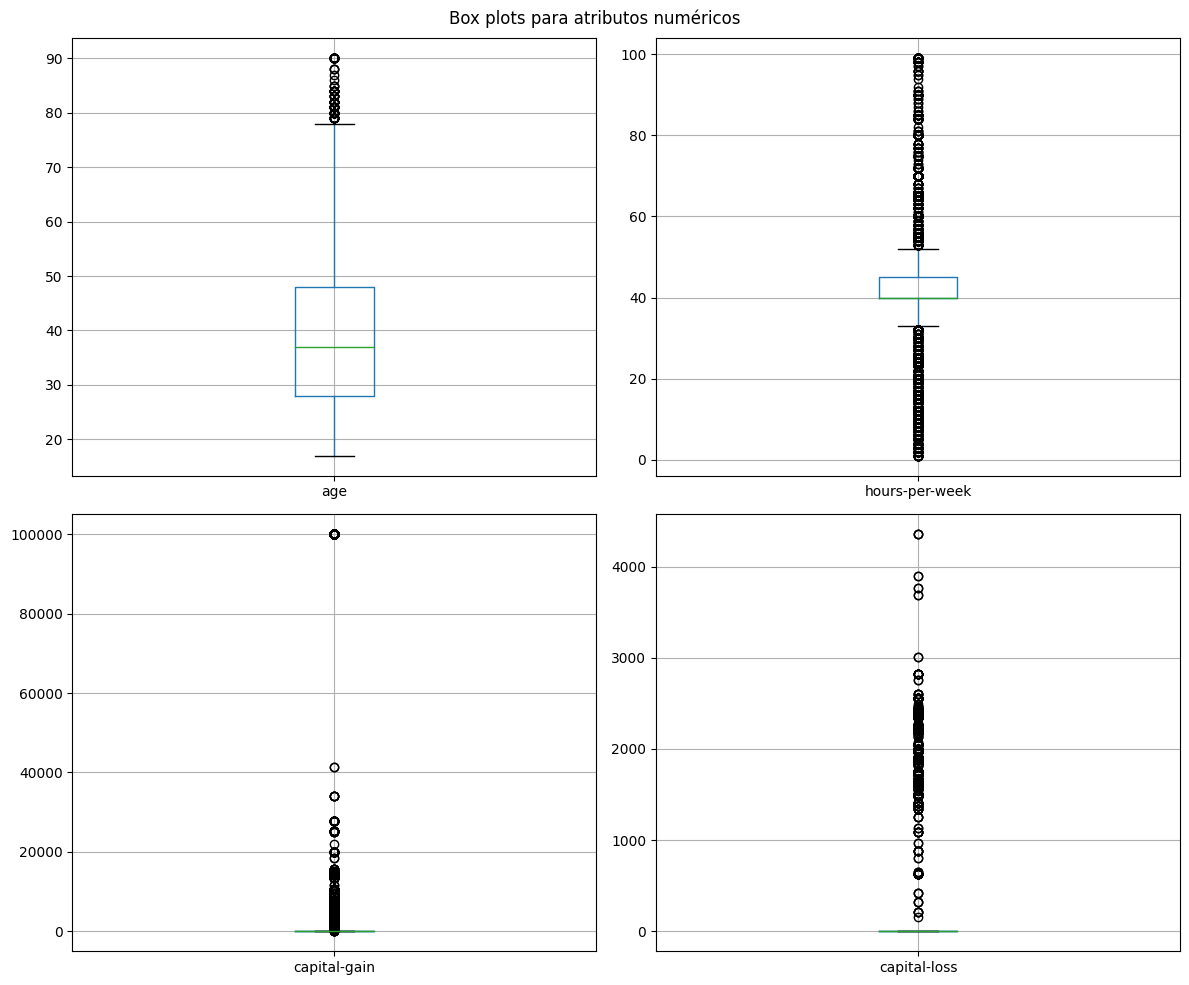

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
data.boxplot(column='age', ax=ax[0, 0])
data.boxplot(column='hours-per-week', ax=ax[0, 1])
data.boxplot(column='capital-gain', ax=ax[1, 0])
data.boxplot(column='capital-loss', ax=ax[1, 1])
plt.suptitle('Box plots para atributos numéricos')
plt.show()

## Analisando Atributos Categóricos

### Gráfico de Barras para Atributos Categóricos

Gráficos de barras são úteis para visualizar a distribuição de atributos categóricos, como `workclass`, `education` e `marital-status`.

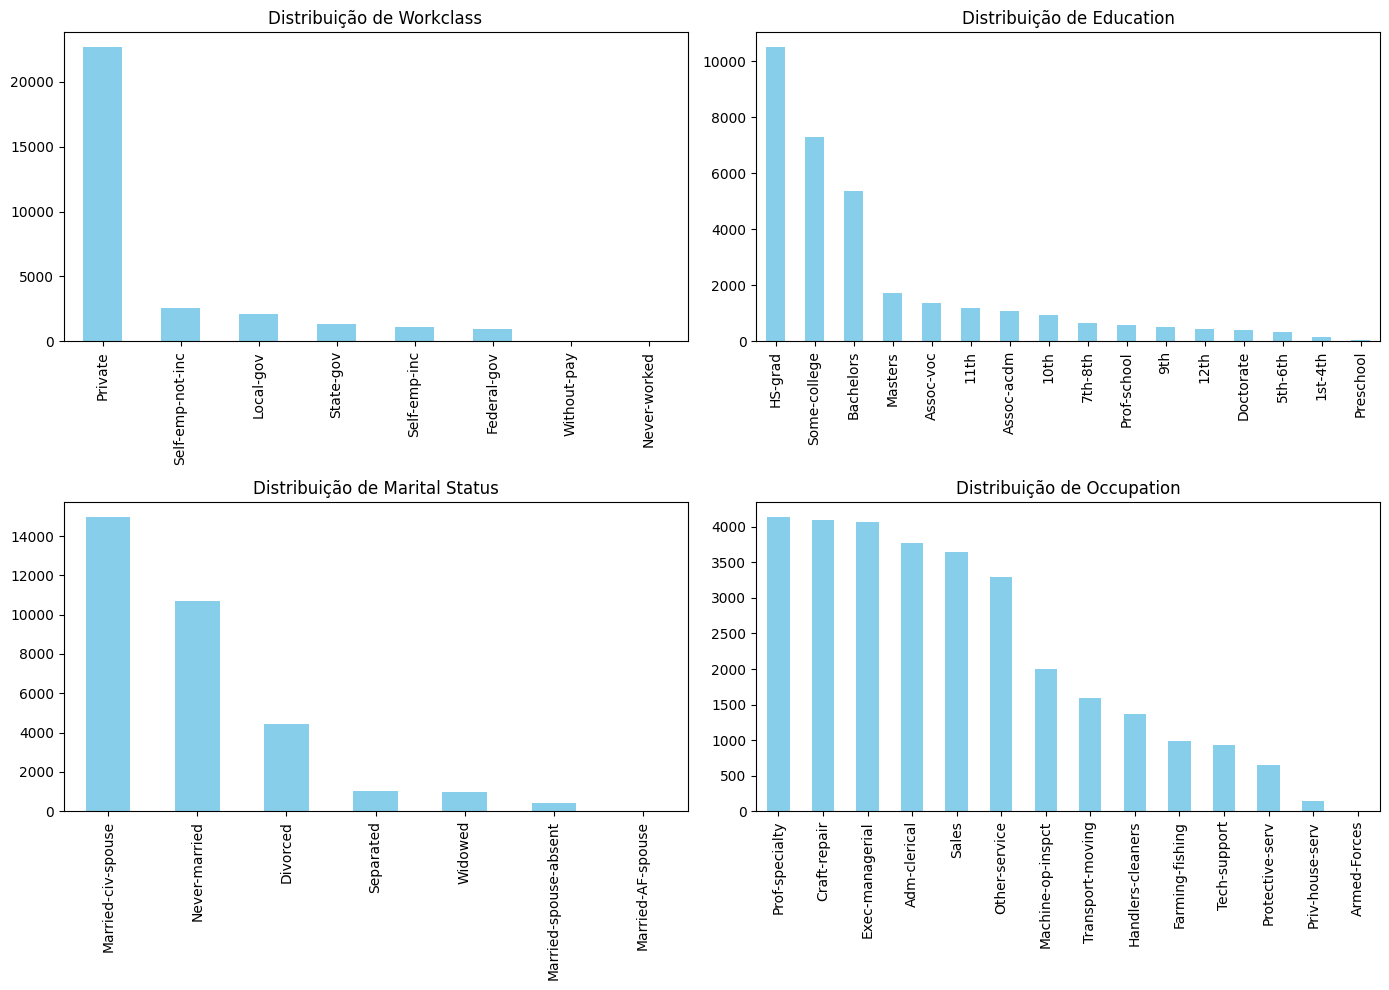

In [35]:
# Gráficos de barras para atributos categóricos
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

data['workclass'].value_counts().plot(kind='bar', ax=ax[0, 0], color='skyblue')
ax[0, 0].set_title('Distribuição de Workclass')

data['education'].value_counts().plot(kind='bar', ax=ax[0, 1], color='skyblue')
ax[0, 1].set_title('Distribuição de Education')

data['marital-status'].value_counts().plot(kind='bar', ax=ax[1, 0], color='skyblue')
ax[1, 0].set_title('Distribuição de Marital Status')

data['occupation'].value_counts().plot(kind='bar', ax=ax[1, 1], color='skyblue')
ax[1, 1].set_title('Distribuição de Occupation')

plt.tight_layout()
plt.show()

## Verificando a proporção de categorias de um atributo

A conjunto de dados Adult Income possui o atributo categórico `income`, com duas categorias, `<=50K` e `>50K`.



In [ ]:
data.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

O código abaixo produto um gráfico de pizza para ilustrar a proporção de linhas no conjunto de dados para cada categoria do atributo `income`.

In [ ]:
print(f"Proporção para {'<=50K'}: " + str(round(data[data['income'] == '<=50K'].shape[0]/data.shape[0] * 100, 2)) + "%")
print(f"Proporção para {'>50K'}: " + str(round(data[data['income'] == '>50K'].shape[0]/data.shape[0] * 100, 2)) + "%")

Proporção para <=50K: 75.92%
Proporção para >50K: 24.08%


Podemos produzir uma perspectiva gráficas dessas proporções usando um gráfico de pizza, conforme ilustrado abaixo.

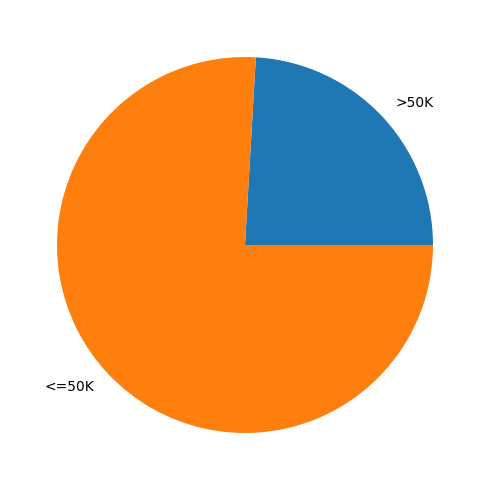

In [ ]:
divisao_categorias = [ data[data['income'] == '>50K'].shape[0], data[data['income'] == '<=50K'].shape[0] ]
categorias = ['>50K', '<=50K']

plt.pie(divisao_categorias, labels = categorias)
plt.show()

A seguir, um exemplo mais elaborado.

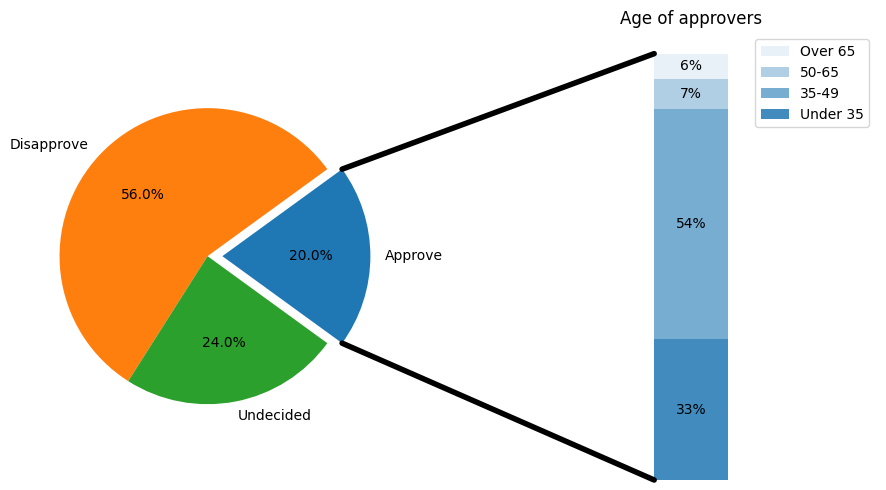

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [.20, .56, .24]
labels = ['Approve', 'Disapprove', 'Undecided']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.33, .54, .07, .06]
age_labels = ['Under 35', '35-49', '50-65', 'Over 65']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Age of approvers')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

## Construindo uma tabela de contingência

Uma tabela de contingência, também conhecida como tabela cruzada (ou em inglês, contingency table ou crosstab), é uma ferramenta estatística usada para analisar a relação entre duas ou mais variáveis categóricas. Essas tabelas mostram a frequência com que diferentes combinações de variáveis categóricas ocorrem em um conjunto de dados.

Uma tabela de contingência é organizada em formato de matriz, onde:
- Linhas representam as categorias de uma variável.
- Colunas representam as categorias de outra variável.
- Células da tabela contêm contagens (ou frequências) de observações que correspondem à combinação das categorias da linha e da coluna.

 Tabelas de contingência oferecem uma maneira intuitiva de visualizar a distribuição conjunta de duas variáveis categóricas.

O código abaixo cria e exibe uma tabela de contingência que mostra a contagem de ocorrências de cada combinação de `sex` e `occupation` no conjunto de dados Adult Income. A apresentação alternativa, via visualização por mapa de calor, ajuda a identificar padrões ou relações entre as variáveis categóricas.

In [ ]:
# Criar uma matriz de contingência entre 'sex' e 'occupation'
contingency_table = pd.crosstab(data['occupation'], data['sex'])

# Exibir a matriz de contingência
print(contingency_table)

sex                Female  Male
occupation                     
Adm-clerical         2537  1233
Armed-Forces            0     9
Craft-repair          222  3877
Exec-managerial      1159  2907
Farming-fishing        65   929
Handlers-cleaners     164  1206
Machine-op-inspct     550  1452
Other-service        1800  1495
Priv-house-serv       141     8
Prof-specialty       1515  2625
Protective-serv        76   573
Sales                1263  2387
Tech-support          348   580
Transport-moving       90  1507


É possível apresentar os dados tabela de contingência de forma gráfica, conforme ilustra o código abaixo.

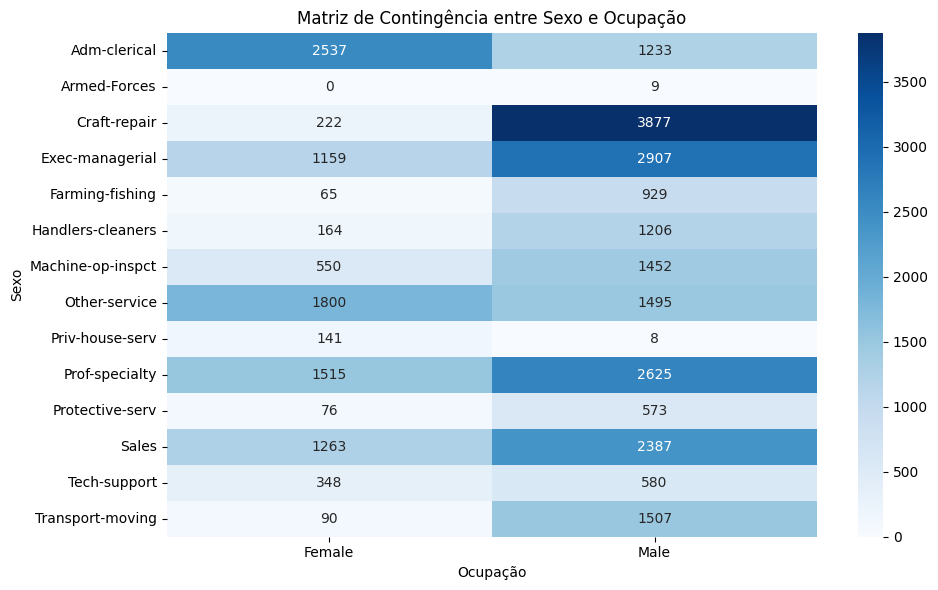

In [ ]:
# Visualizar a matriz de contingência usando um heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Contingência entre Sexo e Ocupação')
plt.ylabel('Sexo')
plt.xlabel('Ocupação')
plt.show()

Outro exemplo de tabela de contingência é apresentado abaixo, desta vez cruzando faixas de idade e nível de escolaridade.

In [ ]:
# Criando a tabela de frequência cruzada para 'age' e 'education'
age_education_crosstab = pd.crosstab(categorias_idade, data['education'])

# Exibindo a tabela de frequência
age_education_crosstab

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
age,,,,,,,,,,,,,,,,
<35,469,733,272,47,116,162,202,470,575,2219,64,4465,356,18,115,3766
35-49,198,245,92,46,101,158,147,446,577,2161,174,3625,865,14,293,2308
50-65,216,159,63,57,88,233,128,135,195,830,139,2042,439,15,132,1033
>65,50,38,6,18,28,93,37,16,35,145,36,369,63,4,36,184


## Analisando Relações

### a. Gráfico de Dispersão

Gráficos de dispersão podem ser usados para explorar as relações entre atributos numéricos, como `age` (idade) e `hours-per-week` (horas por semana).

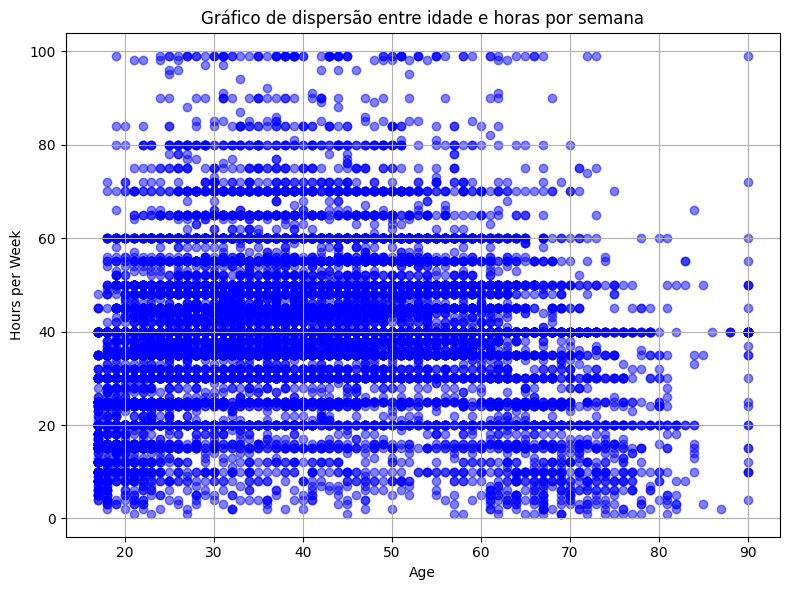

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['hours-per-week'], alpha=0.5, color='b')
plt.title('Gráfico de dispersão entre idade e horas por semana')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.grid(True)
plt.show()

### b. Matriz de Correlação com Heatmap

Uma matriz de correlação e um heatmap podem ajudar a identificar a força das relações entre atributos numéricos.

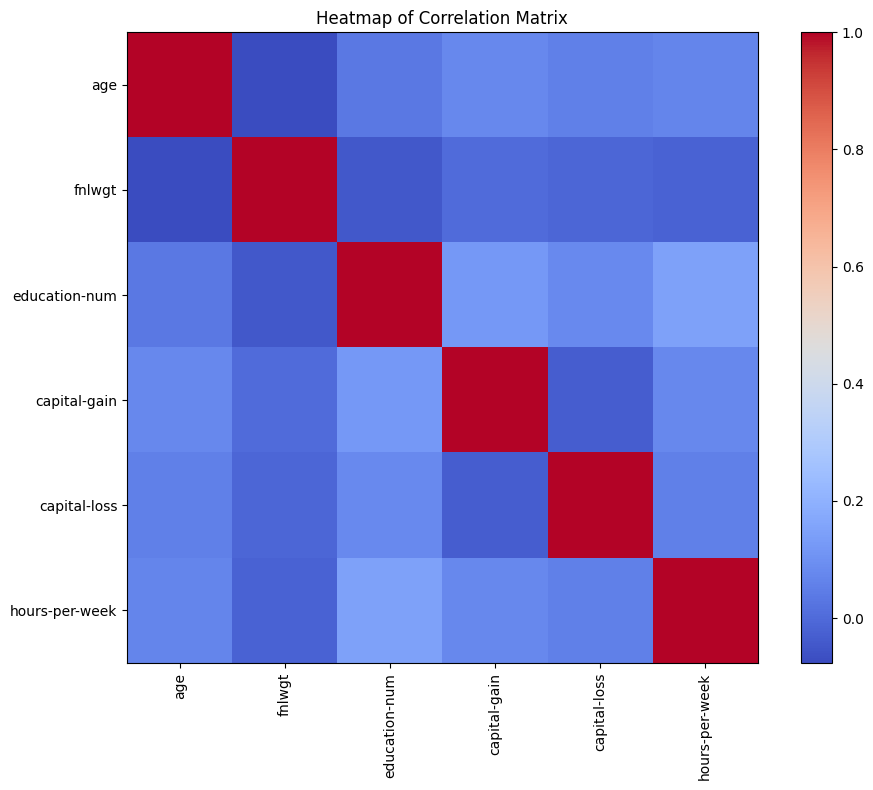

In [37]:
import numpy as np

# Calcular a matriz de correlação
corr = data.corr()

# Heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(np.arange(len(corr.columns)), corr.columns)
plt.title('Heatmap of Correlation Matrix')
plt.show()

### c. Relação entre dois atributos categóricos

Tabela de Contingência (ou Tabela Cruzada).

> Uma tabela de contingência mostra a frequência conjunta de duas variáveis categóricas. Pode ser usada para visualizar a distribuição conjunta e entender como os atributos categóricos estão relacionados.

Exemplo (com o dataset Adult Income): Podemos criar uma tabela de contingência entre a variável `sex` (sexo) e `race` (raça) para ver como as categorias de sexo e raça estão distribuídas.

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = data

# Criar uma tabela de contingência entre 'sex' e 'race'
contingency_table = pd.crosstab(df['sex'], df['race'])
print(contingency_table)

race    Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White
sex                                                                
Female                 119                 346   1555    109   8642
Male                   192                 693   1569    162  19174


Gráficos de Barras Empilhadas:

> Esse gráfico pode ser usado para visualizar a distribuição de uma variável categórica dentro das categorias de outra variável categórica.

Veja o exemplo a seguir no contexto do dataset Adult Income. Nesse exemplo, um gráfico de barras empilhadas mostra a distribuição de `income` (renda) dentro das categorias de `education` (educação).

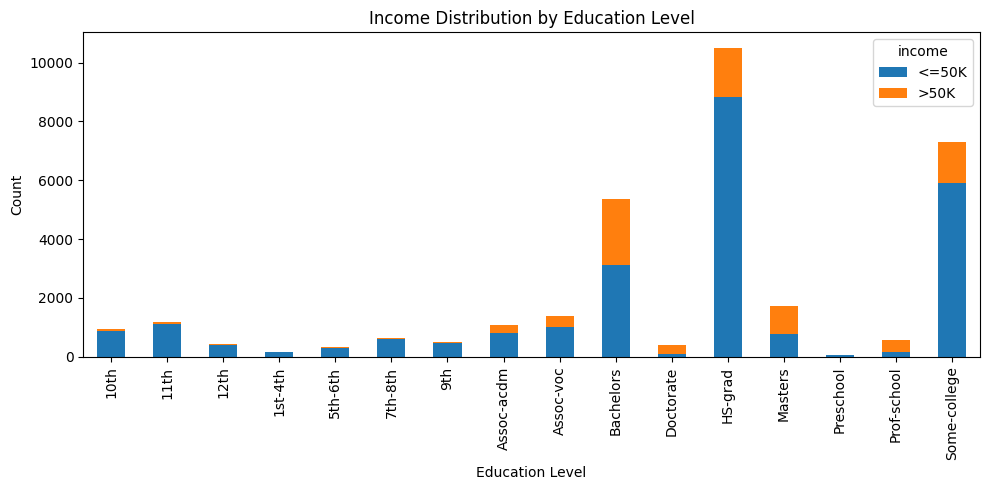

In [39]:
# Gráfico de barras empilhadas para 'education' e 'income'
education_income_counts = pd.crosstab(df['education'], df['income'])
education_income_counts.plot(kind='bar', stacked=True)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Income Distribution by Education Level')
plt.show()

O código cria um gráfico de mosaico para visualizar a distribuição das categorias de estado civiil (variável `marital-status`), ajustando o tamanho da figura, o espaçamento entre as subdivisões, e desativando os rótulos dos eixos.

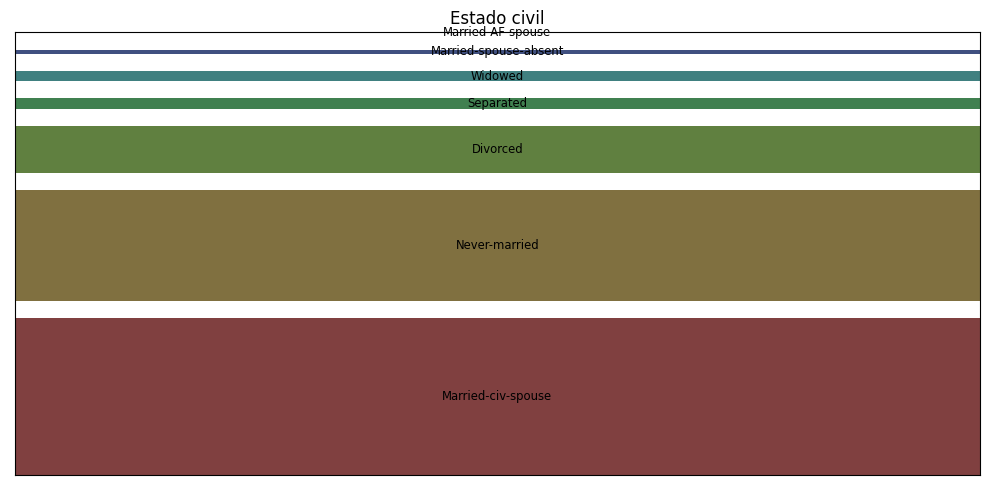

In [40]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# plt.rcParams["figure.figsize"] = [7.00, 3.50]
# plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.figsize"] = [10.00, 5.00]  # Increase figure size
plt.rcParams["figure.autolayout"] = True

# Obter as frequências dos níveis de 'marital-status'
marital_status_counts = df['marital-status'].value_counts()

# Converter a Series para um dicionário
marital_status_dict = marital_status_counts.to_dict()

# Create mosaic plot
mosaic(marital_status_dict, title='Estado civil', horizontal=False, gap = 0.05, axes_label=False)
plt.show()

O código abaixo cria uma tabela de contingência que mostra a relação entre as variáveis `sex` e `marital-status`. A tabela de contingência ajuda a entender como as categorias de `sex` estão distribuídas em relação às categorias de `marital-status`.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic

# Carregar o dataset
df = data

# Criar uma tabela de contingência entre 'sex' e 'marital-status'
contingency_table = pd.crosstab(df['sex'], df['marital-status'])

contingency_table

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
sex,,,,,,,
Female,2672,14,1657,205,4767,631,825
Male,1771,9,13319,213,5916,394,168
